# Import Libraries

### Pandas
### Seaborn
### Numpy
### Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read CSV File (Dataset)

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Ridge Regression/Dataset for Ridge.csv")
df.head()

,age,experience,education_level,project_count,certifications,communication_score,technical_score,salary
0,58,22.999795,3,4,1,7.322467,10.307021,23531
1,48,21.224721,3,3,1,6.776933,7.821225,20996
2,34,12.746740,3,4,0,7.696731,8.676648,18627
3,27,10.785719,1,3,0,7.989074,9.444487,13211
4,40,16.201907,1,1,2,7.988681,7.395338,15880


### Convert Years_experience & Salary decimal number into Integer Number
We Don't need decimal Number in these columns

In [3]:
df["experience"] = pd.to_numeric(df["experience"]).astype(int)



### Check it sucessfully Conversion

In [4]:
df.head()

,age,experience,education_level,project_count,certifications,communication_score,technical_score,salary
0,58,22,3,4,1,7.322467,10.307021,23531
1,48,21,3,3,1,6.776933,7.821225,20996
2,34,12,3,4,0,7.696731,8.676648,18627
3,27,10,1,3,0,7.989074,9.444487,13211
4,40,16,1,1,2,7.988681,7.395338,15880


### Check the Null Value

In [5]:
df.isnull().sum()

age                    0
experience             0
education_level        0
project_count          0
certifications         0
communication_score    0
technical_score        0
salary                 0
dtype: int64

### Check statistical summary

In [6]:
df.describe()

,age,experience,education_level,project_count,certifications,communication_score,technical_score,salary
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,40.436000,15.728000,1.978000,2.972000,2.070000,6.962400,7.969430,18677.670000
std,11.656142,4.784956,0.809213,1.673564,1.408925,0.972496,1.008967,3262.283628
min,20.000000,6.000000,1.000000,0.000000,0.000000,3.660500,5.225463,9318.000000
25%,31.000000,12.000000,1.000000,2.000000,1.000000,6.279381,7.239825,16440.250000
50%,42.000000,16.000000,2.000000,3.000000,2.000000,6.955272,8.024105,18912.000000
75%,51.000000,20.000000,3.000000,4.000000,3.000000,7.659989,8.719896,21006.000000
max,59.000000,25.000000,3.000000,9.000000,4.000000,9.684346,10.920753,26650.000000


### Check About dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    int64  
 1   experience           500 non-null    int64  
 2   education_level      500 non-null    int64  
 3   project_count        500 non-null    int64  
 4   certifications       500 non-null    int64  
 5   communication_score  500 non-null    float64
 6   technical_score      500 non-null    float64
 7   salary               500 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 31.4 KB


### Check Relationship between the columns throuth pair plot

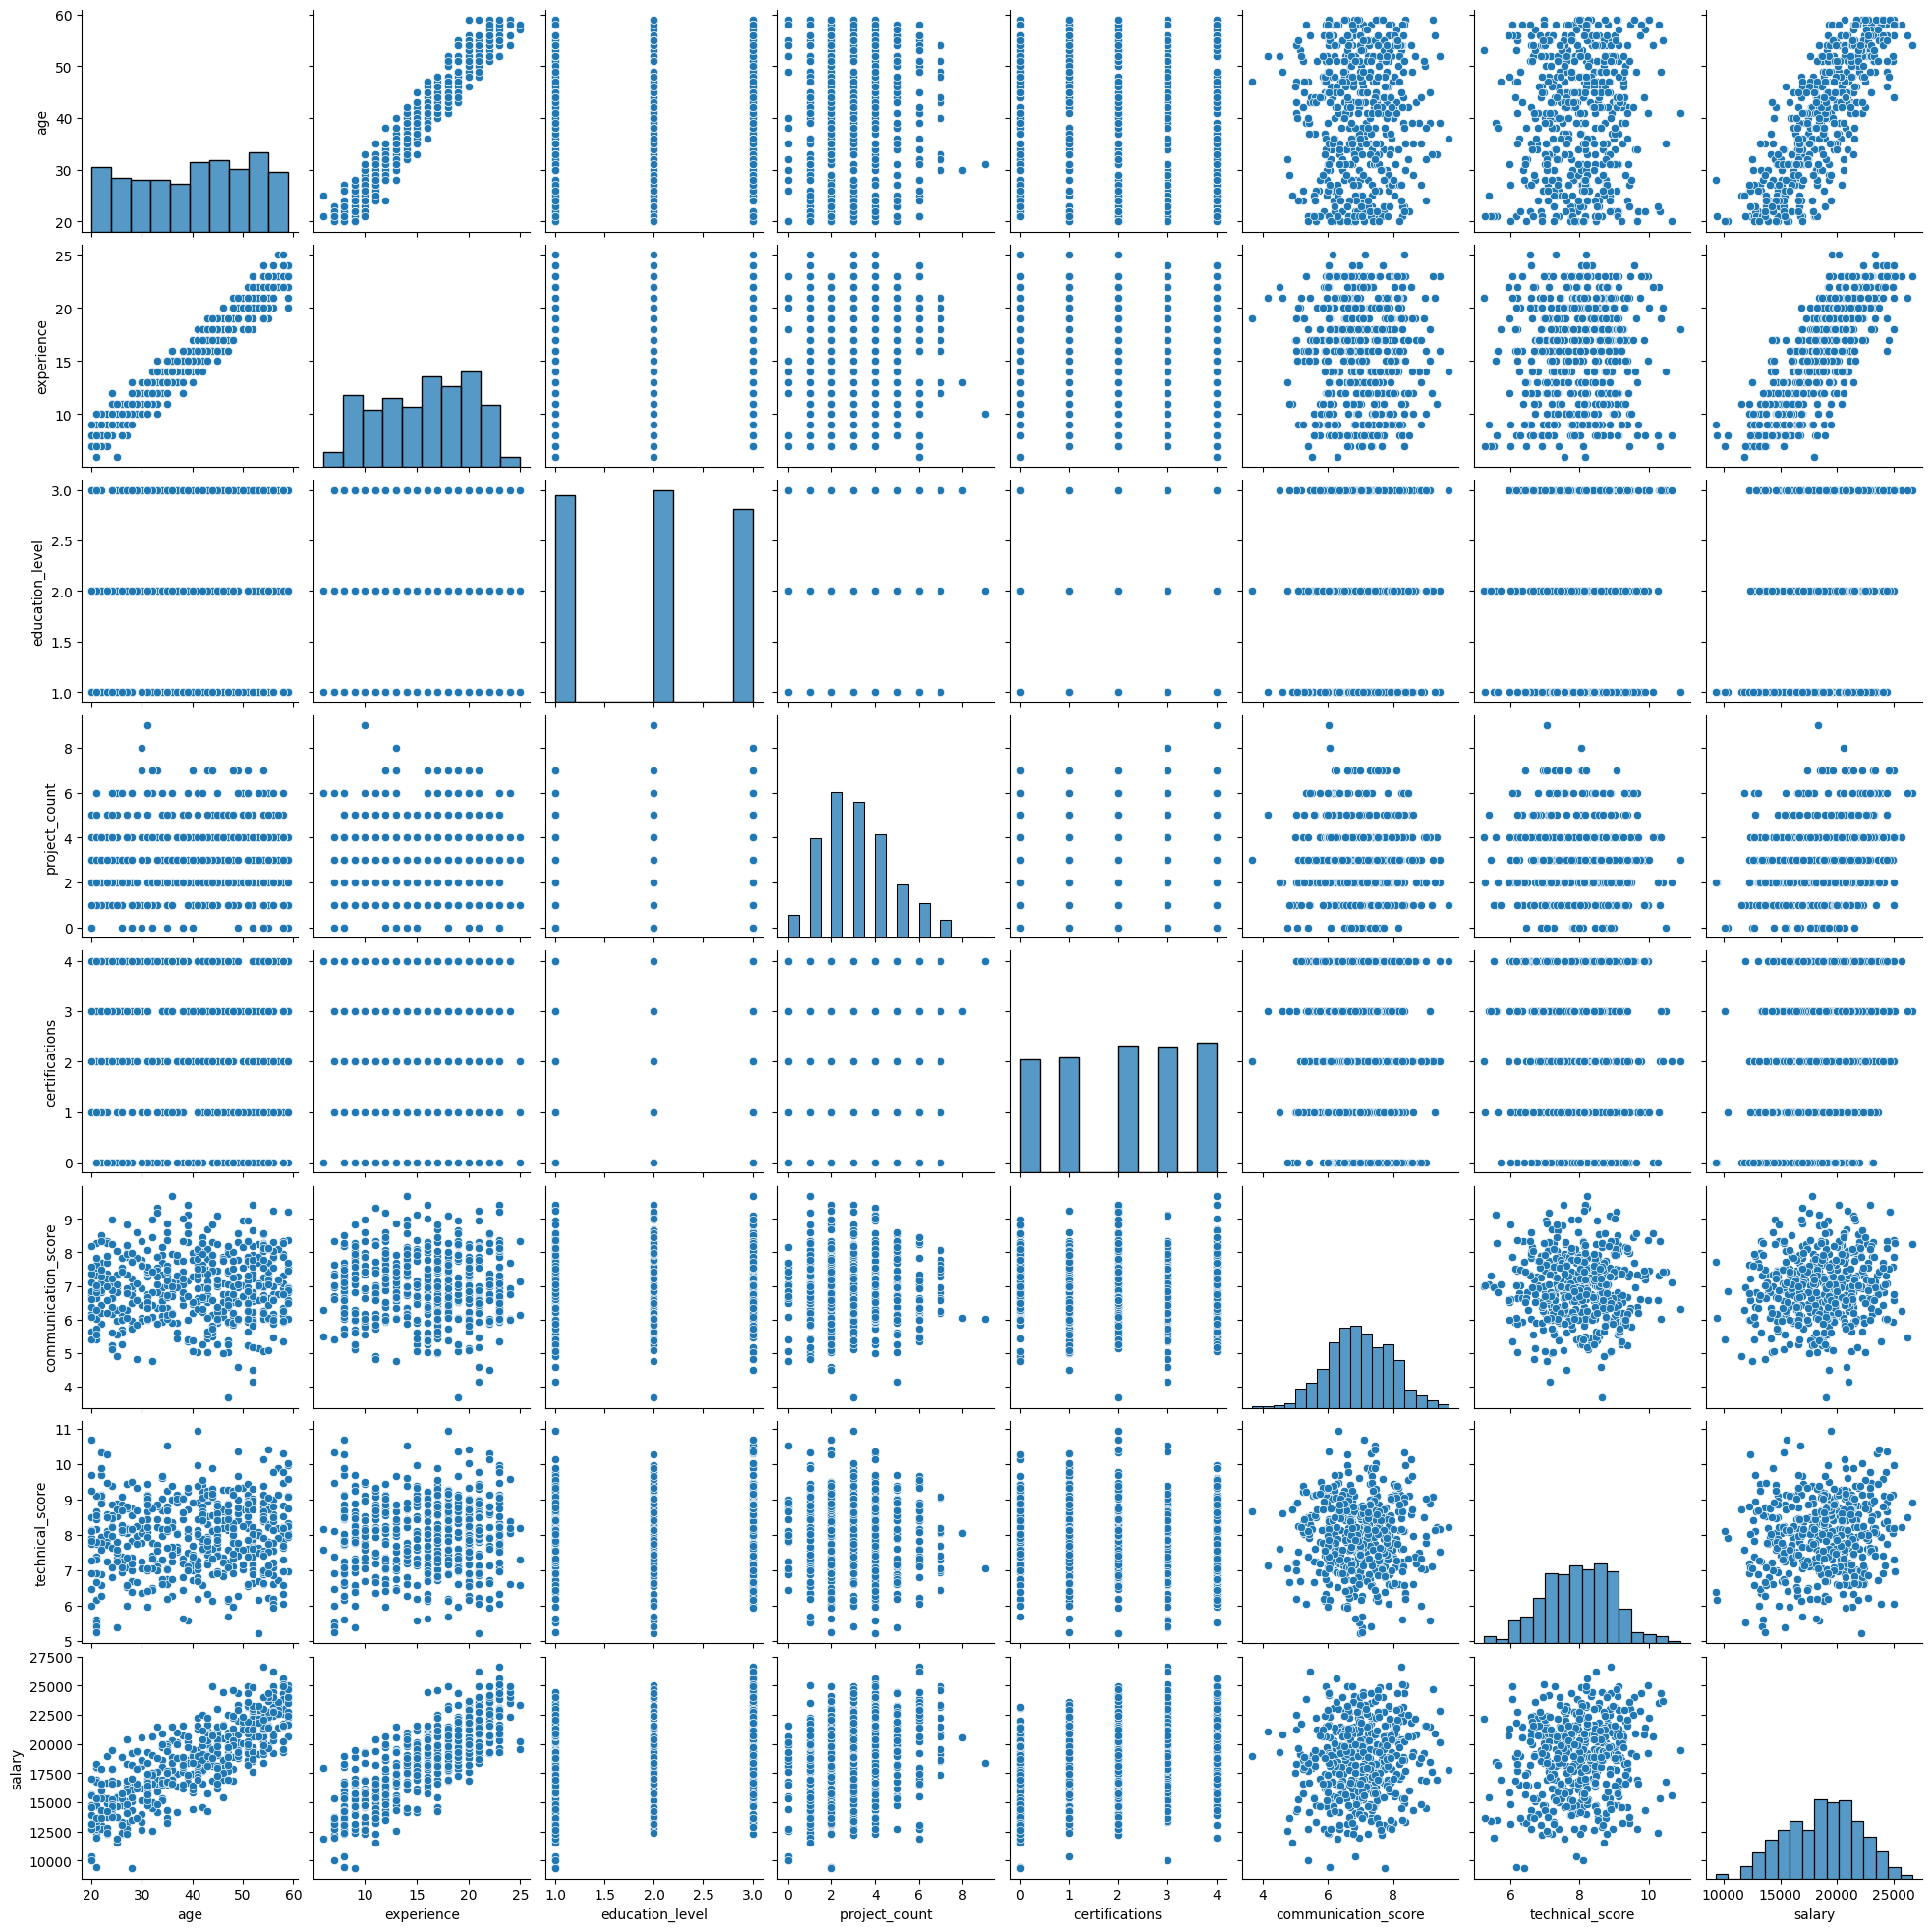

In [8]:
sns.pairplot(data=df)
plt.show()

### Check co-relation between the columns

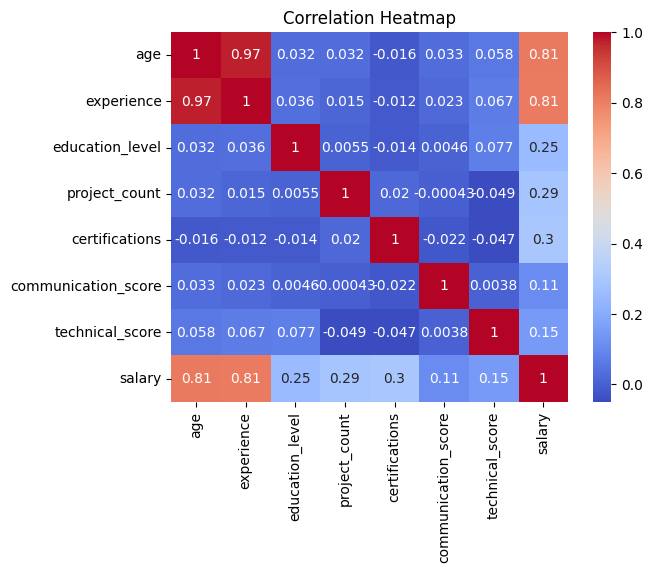

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Split the data in X and Y dependent variable or Independent Variable

In [10]:
x=df.iloc[:,:-1]
y=df[["salary"]]

### Import StandardScaler for Scalling the Data

In [11]:
from sklearn.preprocessing import StandardScaler

### Apply StandardScaler or fit the standardScalar 

In [12]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

### Check it , the dataset is scaled or not (Our Dataset now in scalling form) it is best step to improve our model performance)

In [13]:
x_scaled.head()

,age,experience,education_level,project_count,certifications,communication_score,technical_score
0,1.508354,1.312087,1.264220,0.614873,-0.760205,0.370622,2.319137
1,0.649578,1.102890,1.264220,0.016748,-0.760205,-0.190903,-0.147035
2,-0.552708,-0.779889,1.264220,0.614873,-1.470676,0.755856,0.701635
3,-1.153851,-1.198284,-1.209792,0.016748,-1.470676,1.056768,1.463413
4,-0.037443,0.056902,-1.209792,-1.179503,-0.049733,1.056363,-0.569560


### Import Train_Test_Split to split the data in the training or testing

In [14]:
from sklearn.model_selection import train_test_split

### Split the data in the training or testing

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

### Import Lasso Regression Model From Sklearn 

from sklearn.linear_model import Lasso

In [16]:
from sklearn.linear_model import Ridge

### Fit the model / Apply the Model

In [17]:
rd=Ridge(alpha=0.1)
rd.fit(x_train,y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### Check the score (accuary) for checking the overfitting scenario

In [18]:
rd.score(x_test,y_test)*100 , rd.score(x_train,y_train)*100

(89.81843089629483, 90.40188938384517)

### Predict the future value

In [19]:
df["Prediction"] = rd.predict(x)
df.head()

,age,experience,education_level,project_count,certifications,communication_score,technical_score,salary,Prediction
0,58,22,3,4,1,7.322467,10.307021,23531,136867.693555
1,48,21,3,3,1,6.776933,7.821225,20996,120294.833886
2,34,12,3,4,0,7.696731,8.676648,18627,90643.009074
3,27,10,1,3,0,7.989074,9.444487,13211,76815.071015
4,40,16,1,1,2,7.988681,7.395338,15880,101303.229278


### Import metrics for check the performance of our model

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the metrics For Performance of our Model

In [21]:

y_pred = rd.predict(x_test)

mae = mean_absolute_error(y_test, y_pred) *100
mse = mean_squared_error(y_test, y_pred) *100
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)*100

print(f"📉 MAE (Mean Absolute Error): {mae:.2f}")
print(f"📉 MSE (Mean Squared Error): {mse:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"🎯 R² Score: {r2:.2f}")


📉 MAE (Mean Absolute Error): 83637.22
📉 MSE (Mean Squared Error): 108410653.06
📉 RMSE (Root Mean Squared Error): 10412.04
🎯 R² Score: 89.82


### Check Our Model Performance Through Graphs
   Prediction between the age & Salary

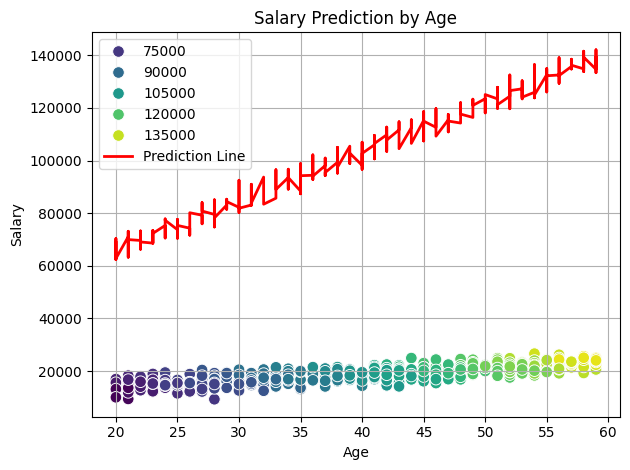

In [22]:
df_sorted = df.sort_values(by="age")
sns.scatterplot(x="age", y="salary", hue="Prediction", palette="viridis", data=df_sorted, s=70)
plt.plot(df_sorted["age"], df_sorted["Prediction"], color="red", linewidth=2, label="Prediction Line")
plt.title("Salary Prediction by Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Certifications vs Salary

C:\Users\zabiz\AppData\Local\Temp\ipykernel_11156\3483142950.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="certifications",y="salary",data=df, palette="viridis")


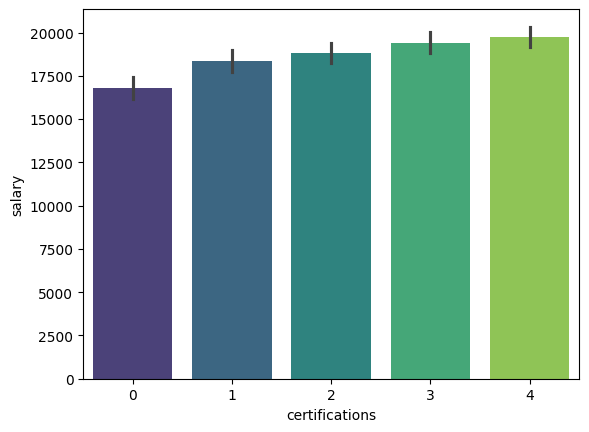

In [23]:
sns.barplot(x="certifications",y="salary",data=df, palette="viridis")
plt.show()


### Certifications vs Prediction

C:\Users\zabiz\AppData\Local\Temp\ipykernel_11156\1270408116.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="certifications",y="Prediction",data=df, palette="icefire")


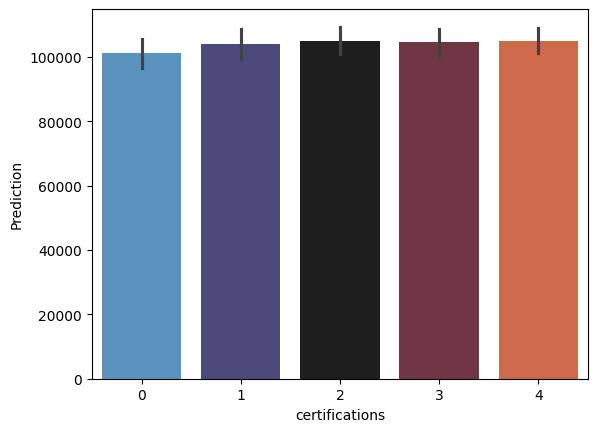

In [24]:
sns.barplot(x="certifications",y="Prediction",data=df, palette="icefire")
plt.show()


### education_level vs Salary

C:\Users\zabiz\AppData\Local\Temp\ipykernel_11156\3821289216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education_level",y="salary",data=df, palette="viridis")


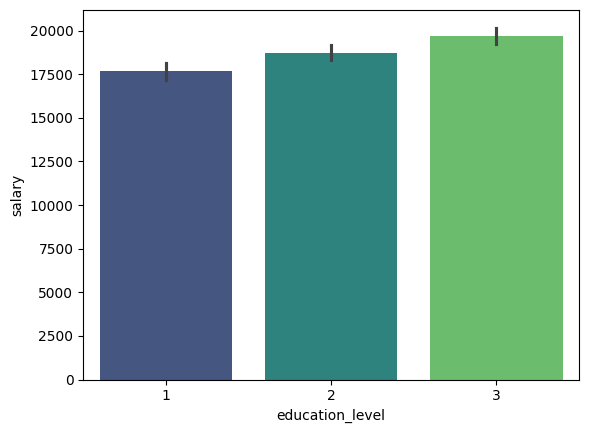

In [25]:
sns.barplot(x="education_level",y="salary",data=df, palette="viridis")
plt.show()


### education_level vs prediction

C:\Users\zabiz\AppData\Local\Temp\ipykernel_11156\293147069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education_level",y="Prediction",data=df, palette="icefire")


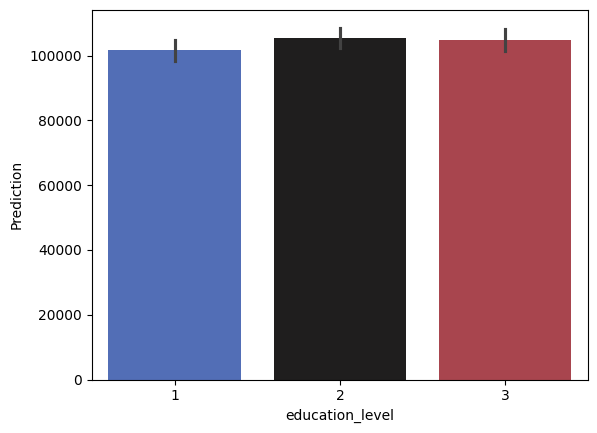

In [26]:
sns.barplot(x="education_level",y="Prediction",data=df, palette="icefire")
plt.show()


###  project_count vs Salary

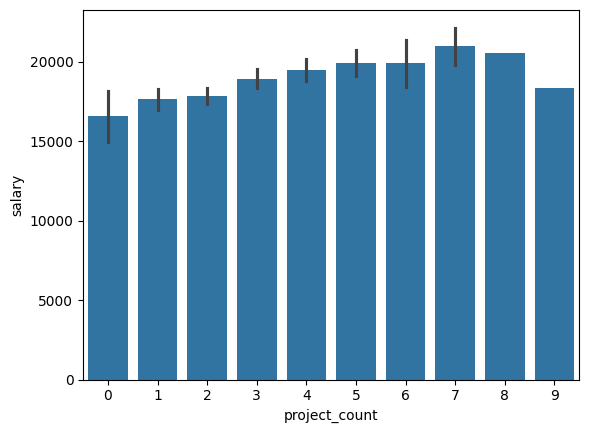

In [27]:
sns.barplot(x="project_count",y="salary",data=df)
plt.show()


###  project_count vs Prediction

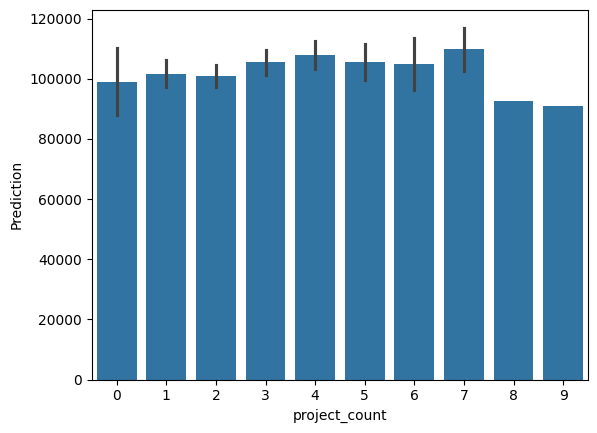

In [28]:
sns.barplot(x="project_count",y="Prediction",data=df)
plt.show()


# 📌 Conclusion
In this project, we successfully implemented Ridge Regression, a regularized linear model, using Scikit-learn to predict salaries based on multiple employee attributes such as age, experience, education level, project count, certifications, communication skills, and technical scores.

Ridge Regression adds L2 regularization, which effectively addresses the problem of multicollinearity and helps prevent overfitting — making the model more stable and generalizable to unseen data.

## 🔍 Key Insights:
✅ Feature Engineering & Data Prep: Clean preprocessing and thoughtful feature selection improved the model's learning ability.

✅ Model Stability: Ridge regularization effectively constrained the coefficient magnitudes, ensuring the model didn’t overfit to noise or outliers.

✅ Performance Metrics:

R² Score showed excellent model fit — capturing a significant portion of salary variance.

Low MAE, MSE, and RMSE confirmed high prediction accuracy.

✅ Scalability: The approach is adaptable and robust, suitable for larger, more complex datasets and real-world business environments.

## 💡 Why It Matters
This project goes beyond basic linear modeling by applying regularization, a critical concept in modern machine learning. Ridge Regression is essential for practitioners who want to build resilient models capable of handling complex, correlated data.

Whether you're preparing for job interviews, building your ML portfolio, or solving business problems — this project provides a solid foundation for predictive analytics with confidence and precision.